In [316]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [317]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.0 Understand the Data

##### 1.1 Read the CSV file provided by consumer finance company for analysis

In [318]:
loan_df = pd.read_csv('loan.csv')

#review the dataframe
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### 1.2 Understand Meta Data
- Total number of records in loan_df is 39717
- Total number of Columns in loan_df is 111

In [319]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [320]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [321]:
loan_df.shape

(39717, 111)

In [322]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### 2.0 Data Cleaning

##### 2.1 Remove all the null's and NA column from the Dataframe
- Fetch all the column stats on null values
- Drop all the columns which has all the null or NA values ,as this will not help us in the analysis
- Drop the columns where majority of data is null say 90%
- Drop the columns which has no significance in the analysis 

In [323]:
#Fetch all the column stats on null values
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2458
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12939
purpose                               0
title                                10
zip_code                              0
addr_state                            0
dti                                   0


In [324]:
#Drop all the columns which has all the null or NA values ,as this will not help us in the analysis
loan_df.dropna(axis='columns',how='all',inplace=True)

In [325]:
#analyse the dataframe ,whether the column actually dropped or not
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2458
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12939
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [326]:
# 54 columns are dropped out of 111 
loan_df.shape

(39717, 57)

In [327]:
# find the percentage of nulls or NA in the columns 
round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     0.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [328]:
#find the columns whose total percentage of null values is 90%
loan_df.columns[(loan_df.isnull().sum()/len(loan_df.index)) *100 > 90]

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [329]:
#drop the columns whose total percentage of null values is 90%
loan_df.drop(loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) > 90], axis=1,inplace=True)

In [330]:
#analyse the dataframe again 
 ## 2 more column is dropped 
loan_df.shape

(39717, 55)

In [331]:
#again check for whose
loan_df.columns[(loan_df.isnull().sum()/len(loan_df.index)) *100 > 0]

Index(['emp_title', 'desc', 'title', 'mths_since_last_delinq', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [332]:
# drop the columns which does not have any significance in the analsysis
  ## desc - Loan description provided by the borrower
  ## url  - URL for the LC page with listing data
loan_df.drop(['desc','url'], axis=1,inplace=True)

In [333]:
#analyse the dataframe again
loan_df.shape

(39717, 53)

In [334]:
#check the missing values in the rows 
  #as of now dont know ,whether the null columns is been used for the analysis or not ,so ignoring this TODO
loan_df[loan_df.isnull().sum(axis=1)>5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,...,129.76,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,...,89.80,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [335]:
#check the values in home_ownership column
  ## seems like OTHER and NONE will not provide any information ,hence it is better to remove them 
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [336]:
# remove columns with value 'OTHER', 'NONE' from the home_ownership column
loan_df.drop(loan_df[loan_df['home_ownership'].isin(['NONE','OTHER'])].index,inplace=True)

In [337]:
# again analze the dataframe for unique values
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [338]:
# check the values in verification_status column 
  #seems like source Verified and Verified is same 
loan_df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [339]:
# rename Source Verified to Verified
loan_df['verification_status'] = np.where(loan_df['verification_status'] == "Source Verified", "Verified", loan_df['verification_status'])

In [340]:
#check the columns with unique values
   #column with 1 unique value will not have any significance ,hence it can be dropped
loan_df.nunique()==1

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                     True
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths                False
mths_since_last_delinq        False
open_acc                    

In [341]:
# drop column with only 1 unique value 
for col in loan_df.columns:
    if loan_df[col].nunique() == 1:
        loan_df.drop(col,inplace=True,axis=1)

In [342]:
#check again
loan_df.nunique().head()

id                 39616
member_id          39616
loan_amnt            885
funded_amnt         1041
funded_amnt_inv     8152
dtype: int64

##### 2.2 Make the datatype consistent across dataframe
- Fetch all the column stats on null values

In [343]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39616 entries, 0 to 39716
Data columns (total 44 columns):
id                         39616 non-null int64
member_id                  39616 non-null int64
loan_amnt                  39616 non-null int64
funded_amnt                39616 non-null int64
funded_amnt_inv            39616 non-null float64
term                       39616 non-null object
int_rate                   39616 non-null object
installment                39616 non-null float64
grade                      39616 non-null object
sub_grade                  39616 non-null object
emp_title                  37162 non-null object
emp_length                 39616 non-null object
home_ownership             39616 non-null object
annual_inc                 39616 non-null float64
verification_status        39616 non-null object
issue_d                    39616 non-null object
loan_status                39616 non-null object
purpose                    39616 non-null object
title     

In [344]:
#since the int_rate is object and contain symbol percentage ,better to remove that 
loan_df['int_rate']=pd.to_numeric(loan_df.int_rate.apply(lambda x: x.strip('%')))

In [345]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39616 entries, 0 to 39716
Data columns (total 44 columns):
id                         39616 non-null int64
member_id                  39616 non-null int64
loan_amnt                  39616 non-null int64
funded_amnt                39616 non-null int64
funded_amnt_inv            39616 non-null float64
term                       39616 non-null object
int_rate                   39616 non-null float64
installment                39616 non-null float64
grade                      39616 non-null object
sub_grade                  39616 non-null object
emp_title                  37162 non-null object
emp_length                 39616 non-null object
home_ownership             39616 non-null object
annual_inc                 39616 non-null float64
verification_status        39616 non-null object
issue_d                    39616 non-null object
loan_status                39616 non-null object
purpose                    39616 non-null object
title    

In [346]:
# emp_length also contain characters , we can make that to integer.By removing the years and the + synmbol
#loan_df['emp_length'] = loan_df.emp_length.apply(lambda x: x.strip('years'))
#loan_df['emp_length'] = loan_df.emp_length.apply(lambda x: x.strip('+'))
#loan_df['emp_length'] = loan_df.emp_length.apply(lambda x: x.strip('<'))
#loan_df['emp_length'] = loan_df.emp_length.apply(lambda x: x.strip('>'))

In [347]:
# emp_length also contain characters , we can make that to integer.By removing the years and the + synmbol
# remove  the  nulls from the dataframe
loan_df = loan_df[pd.notnull(loan_df['emp_length'])]

In [348]:
# change the type of the column to int
loan_df['emp_length']=loan_df['emp_length'].str.extract('(\d+)').fillna(0).astype(int)

In [349]:
# analyse the dataframe 
loan_df['emp_length'].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

In [350]:
#check the datatype of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39616 entries, 0 to 39716
Data columns (total 44 columns):
id                         39616 non-null int64
member_id                  39616 non-null int64
loan_amnt                  39616 non-null int64
funded_amnt                39616 non-null int64
funded_amnt_inv            39616 non-null float64
term                       39616 non-null object
int_rate                   39616 non-null float64
installment                39616 non-null float64
grade                      39616 non-null object
sub_grade                  39616 non-null object
emp_title                  37162 non-null object
emp_length                 39616 non-null int64
home_ownership             39616 non-null object
annual_inc                 39616 non-null float64
verification_status        39616 non-null object
issue_d                    39616 non-null object
loan_status                39616 non-null object
purpose                    39616 non-null object
title     

In [351]:
#export loan_data 
loan_df.to_csv("loan_data_chkpt1.csv", sep='\t', encoding='ISO-8859-1')

### 3.0 Data Analysis

##### 3.1 For Data Analysis , create a subset dataframe from the loans whose status is not "Current"
- For the data analysis ,Loans in Current status does not give insites about the Problem statement ,hence filtering that 

In [352]:
#before filtering the dataframe shape is 
loan_df.shape

(39616, 44)

In [353]:
#create a subset dataframe from the loans whose status is not "Current"
loan_not_current_df = loan_df[loan_df['loan_status']!= 'Current']

In [354]:
#analyse the new dataframe shape
loan_not_current_df.shape

(38476, 44)

In [355]:
# Total Defaulter percentage 14.6%
(len(loan_not_current_df[loan_not_current_df['loan_status']=='Charged Off'].index)/len(loan_not_current_df.index))*100

14.577918702567835

In [356]:
# Total Defaulter per home ownership
(loan_not_current_df.groupby(['home_ownership','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

home_ownership  loan_status
MORTGAGE        Charged Off     6.047926
                Fully Paid     38.190041
OWN             Charged Off     1.151367
                Fully Paid      6.580726
RENT            Charged Off     7.378626
                Fully Paid     40.651315
Name: id, dtype: float64

In [357]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_status'], loan_not_current_df['home_ownership']).style.background_gradient(cmap = cm)

home_ownership,MORTGAGE,OWN,RENT
loan_status,,,
Charged Off,2327,443,2839
Fully Paid,14694,2532,15641


In [358]:
# Total Defaulter per term
(loan_not_current_df.groupby(['term','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

term        loan_status
 36 months  Charged Off     8.342863
            Fully Paid     67.018401
 60 months  Charged Off     6.235056
            Fully Paid     18.403680
Name: id, dtype: float64

In [359]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_status'], loan_not_current_df['term']).style.background_gradient(cmap = cm)

term,36 months,60 months
loan_status,,
Charged Off,3210,2399
Fully Paid,25786,7081


In [360]:
# Total Defaulter based on purpose
(loan_not_current_df.groupby(['purpose','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

purpose             loan_status
car                 Charged Off     0.413245
                    Fully Paid      3.477492
credit_card         Charged Off     1.403472
                    Fully Paid     11.633226
debt_consolidation  Charged Off     7.173303
                    Fully Paid     39.645493
educational         Charged Off     0.145545
                    Fully Paid      0.691340
home_improvement    Charged Off     0.899262
                    Fully Paid      6.559933
house               Charged Off     0.153342
                    Fully Paid      0.797900
major_purchase      Charged Off     0.576983
                    Fully Paid      4.992723
medical             Charged Off     0.275496
                    Fully Paid      1.486641
moving              Charged Off     0.236511
                    Fully Paid      1.257927
other               Charged Off     1.639983
                    Fully Paid      8.366254
renewable_energy    Charged Off     0.049381
                    Ful

In [361]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_status'], loan_not_current_df['purpose']).style.background_gradient(cmap = cm)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,159,540,2760,56,346,59,222,106,91,631,19,471,53,96
Fully Paid,1338,4476,15254,266,2524,307,1921,572,484,3219,82,1273,322,829


In [362]:
# Total Defaulter based on verification_status
(loan_not_current_df.groupby(['verification_status','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

verification_status  loan_status
Not Verified         Charged Off     5.541117
                     Fully Paid     37.704023
Verified             Charged Off     9.036802
                     Fully Paid     47.718058
Name: id, dtype: float64

In [363]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_status'], loan_not_current_df['verification_status']).style.background_gradient(cmap = cm)

verification_status,Not Verified,Verified
loan_status,,
Charged Off,2132,3477
Fully Paid,14507,18360


In [364]:
# Total Defaulter based on grade
(loan_not_current_df.groupby(['grade','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

grade  loan_status
A      Charged Off     1.559414
       Fully Paid     24.482794
B      Charged Off     3.688013
       Fully Paid     26.567211
C      Charged Off     3.495686
       Fully Paid     16.823474
D      Charged Off     2.892712
       Fully Paid     10.279135
E      Charged Off     1.853103
       Fully Paid      5.049901
F      Charged Off     0.826489
       Fully Paid      1.704959
G      Charged Off     0.262501
       Fully Paid      0.514607
Name: id, dtype: float64

In [365]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_status'], loan_not_current_df['grade']).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,600,1419,1345,1113,713,318,101
Fully Paid,9420,10222,6473,3955,1943,656,198


In [366]:
#create issue_year column from data frame
loan_not_current_df['issue_year']=loan_not_current_df['issue_d'].str.split('-', 1).str[1]

In [367]:
#analyze the dataframe again
loan_not_current_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,11
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,11
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,11
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,11
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,11


In [368]:
# Total Defaulter based on issue_year
(loan_not_current_df.groupby(['issue_year','loan_status'])['id'].count()/len(loan_not_current_df.index))*100

issue_year  loan_status
07          Charged Off     0.116956
            Fully Paid      0.530201
08          Charged Off     0.636761
            Fully Paid      3.350140
09          Charged Off     1.510032
            Fully Paid     10.570226
10          Charged Off     3.854351
            Fully Paid     26.112382
11          Charged Off     8.459819
            Fully Paid     44.859133
Name: id, dtype: float64

In [369]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_status'], loan_not_current_df['issue_year']).style.background_gradient(cmap = cm)

issue_year,07,08,09,10,11
loan_status,,,,,
Charged Off,45,245,581,1483,3255
Fully Paid,204,1289,4067,10047,17260


In [370]:
#Create a new derived column for monthly income 
loan_not_current_df['monthly_inc']=pd.to_numeric(loan_not_current_df['annual_inc']/12)

In [371]:
loan_not_current_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,monthly_inc
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,11,2000.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,11,2500.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,11,1021.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,11,4100.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,11,3000.0


In [372]:
# loan_not_current_df
loan_not_current_df[['loan_amnt','int_rate','annual_inc','emp_length','monthly_inc','installment']].describe()

,loan_amnt,int_rate,annual_inc,emp_length,monthly_inc,installment
count,38476.000000,38476.000000,3.847600e+04,38476.000000,38476.000000,38476.000000
mean,11048.428241,11.932194,6.877059e+04,4.927721,5730.882755,322.436241
std,7351.912749,3.693647,6.421605e+04,3.453717,5351.337472,208.670657
min,500.000000,5.420000,4.000000e+03,0.000000,333.333333,15.690000
25%,5300.000000,8.940000,4.000000e+04,2.000000,3333.333333,165.740000
50%,9600.000000,11.710000,5.882628e+04,4.000000,4902.190000,277.860000
75%,15000.000000,14.380000,8.200000e+04,9.000000,6833.333333,425.542500
max,35000.000000,24.400000,6.000000e+06,10.000000,500000.000000,1305.190000


##### 3.2 Create Bins for continous variables

In [373]:
# Loan Amount ,looking to the above data 
loan_bins = [0, 5000, 10000, 15000, 20000, 25000,30000,40000]
loan_slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000 above']
loan_not_current_df['loan_amnt_bin'] = pd.cut(loan_not_current_df['loan_amnt'], loan_bins, labels=loan_slot)

In [374]:
# Annual Income ,looking to the above data 
annual_inc_bins = [0, 5000, 10000, 15000, 20000, 25000,30000,50000]
annual_inc_slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000 above']
loan_not_current_df['annual_inc_bin'] = pd.cut(loan_not_current_df['annual_inc'], annual_inc_bins, labels=annual_inc_slot)

In [375]:
# Interest Rate  ,looking to the above data 
int_rate_bins = [0, 5.5, 9.0, 12.0, 15,20]
int_rate_slot = ['0-5.5', '5.5-9.0', '9.0-12.0', '12.0-15', '15 and above']
loan_not_current_df['int_rate_range'] = pd.cut(loan_not_current_df['int_rate'], int_rate_bins, labels=int_rate_slot)

In [376]:
# Monthly Income  ,looking to the above data 
monthly_inc_bins = [0, 3500, 5000, 6000, 7000,500000]
monthly_inc_slot = ['0-3500', '3500-5000', '5000-6000', '6000-7000', '7000 and above']
loan_not_current_df['monthly_inc_range'] = pd.cut(loan_not_current_df['monthly_inc'], monthly_inc_bins, labels=monthly_inc_slot)

In [377]:
# Installement per month  ,looking to the above data 
installment_inc_bins = [0, 170, 280, 380, 450,1310]
installment_inc_slot = ['0-170', '170-280', '280-380', '380-450', '450 and above']
loan_not_current_df['installment_range'] = pd.cut(loan_not_current_df['installment'], installment_inc_bins, labels=installment_inc_slot)

In [378]:
#analyze the dataframe
loan_not_current_df[['annual_inc','annual_inc_bin','monthly_inc','monthly_inc_range','installment_range']].head()

,annual_inc,annual_inc_bin,monthly_inc,monthly_inc_range,installment_range
0,24000.0,20000-25000,2000.0,0-3500,0-170
1,30000.0,25000-30000,2500.0,0-3500,0-170
2,12252.0,10000-15000,1021.0,0-3500,0-170
3,49200.0,30000 above,4100.0,3500-5000,280-380
5,36000.0,30000 above,3000.0,0-3500,0-170


In [379]:
#create a dataframe for charged off
loan_defaulters= loan_not_current_df[loan_not_current_df['loan_status']=='Charged Off']

In [380]:
loan_defaulters.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_year,monthly_inc,loan_amnt_bin,annual_inc_bin,int_rate_range,monthly_inc_range,installment_range
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,11,2500.000000,0-5000,25000-30000,15 and above,0-3500,0-170
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,152.39,Aug-12,0.0,11,3333.333333,5000-10000,30000 above,NaN,0-3500,0-170
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,121.45,Mar-13,0.0,11,1250.000000,5000-10000,10000-15000,12.0-15,0-3500,0-170
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,...,305.38,Nov-12,0.0,11,2500.000000,5000-10000,25000-30000,12.0-15,0-3500,280-380
14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,...,325.74,Mar-14,0.0,11,8333.333333,5000-10000,NaN,9.0-12.0,7000 and above,280-380


##### 3.3 Univariate Analysis 


In [381]:
def draw_countplot(column_name,count_text,title,df):
  sns.set(style="darkgrid")
  plt.figure(figsize=(14,8))
  plt.title(title)
  ax =sns.countplot(x=column_name, data=df)
  ax.set(xlabel='Loan Status', ylabel=count_text)

  for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

  plt.show()

In [382]:
def draw_univariate_plot(column_name,df,type_of_variable,hue=None,title=None):
 sns.set(style="darkgrid")   
 
 if type_of_variable == "Continous" :
   fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
   ax[0].set_title("Distribution Plot")
   sns.distplot(df[column_name],ax=ax[0])
   ax[1].set_title("Box Plot")
   sns.boxplot(data =df, x=column_name,ax=ax[1],orient='v')
   plt.show()
    
 if type_of_variable == "Categorical" :
   fig, ax=plt.subplots(figsize=(14,8))
   plt.title(title)
   ax = sns.countplot(data = df, x= column_name, order=df[column_name].value_counts().index,hue = hue) 
   ax.set(xlabel=column_name, ylabel="Count")
   
   for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
            fontsize=12, color='black', ha='center', va='bottom')
   plt.show()

###### 3.2.1 Categorical Variables - Univariate Analysis
- loan_status 
- home_ownership
- verification_status
- purpose
- Issue year
- Grade
- term

###### 3.2.1.1 Loan Status 
Conclusion
- 14% of the Applicants Defaults
- Already cleaned records with Loan Status as Current

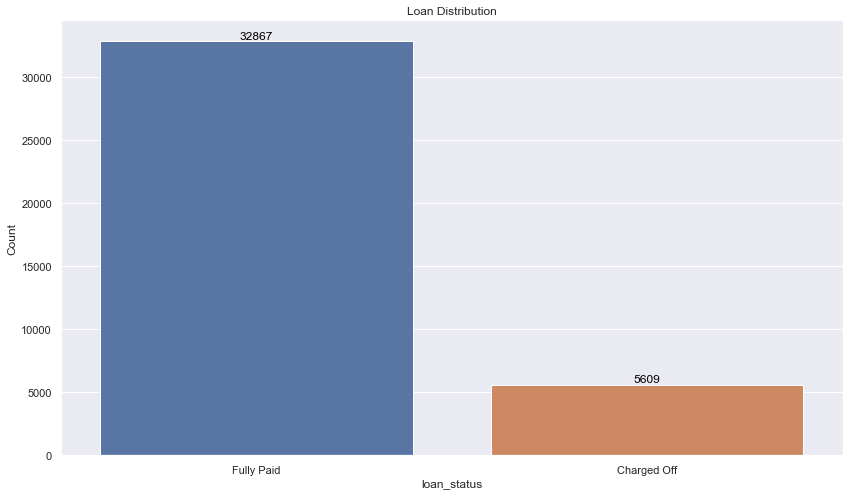

In [383]:
draw_univariate_plot(column_name='loan_status',title='Loan Distribution',df=loan_not_current_df,type_of_variable="Categorical")

###### 3.2.1.2 Home Ownership
Conclusion
- RENT -> 15% of the people Defaults
- MORTGAGE -> 13.5 % of the people Defaults
- OWN -> 14.8% of the people Defaults
- Cleaned records with value NONE ,OTHER

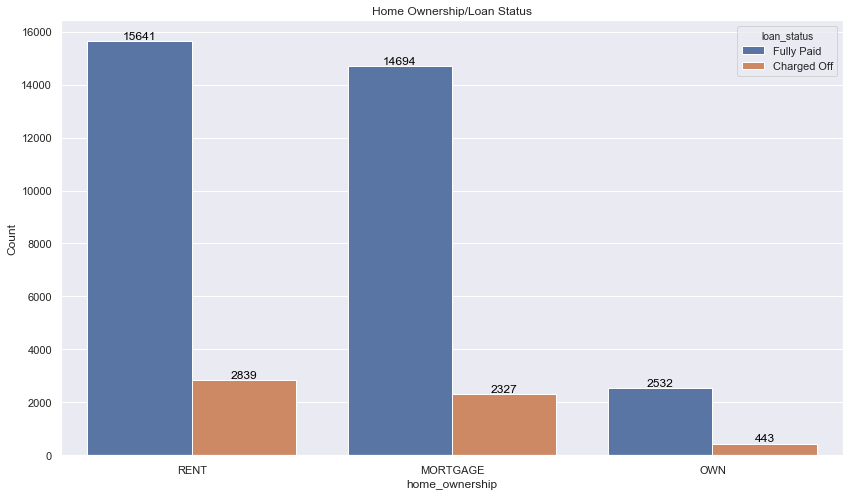

In [384]:
draw_univariate_plot(column_name='home_ownership',title='Home Ownership/Loan Status',df=loan_not_current_df,type_of_variable="Categorical",hue="loan_status")

###### 3.2.1.3 Verification status
Conclusion
- Verified -> 16% of the people Defaults
- Not Verified -> 13 % of the people Defaults
- rename the Source Verified to Verified

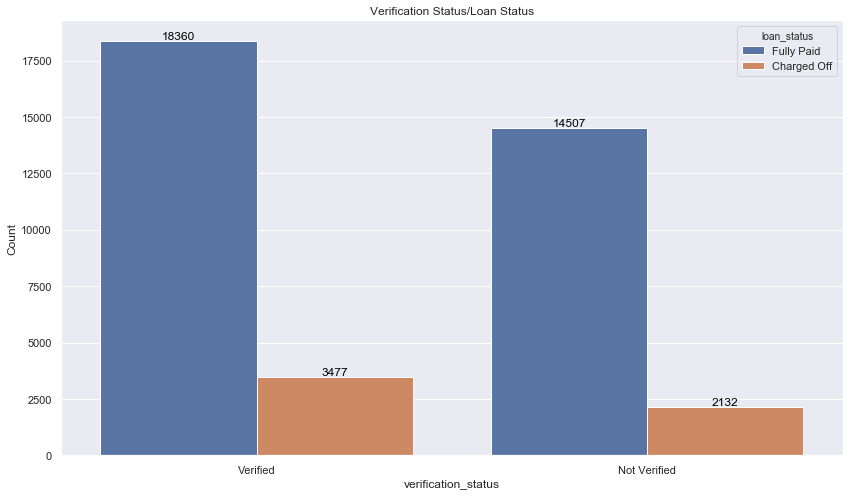

In [385]:
draw_univariate_plot(column_name='verification_status',title='Verification Status/Loan Status',df=loan_not_current_df,type_of_variable="Categorical",hue="loan_status")

###### 3.2.1.3 Purpose
Conclusion
- Debt Consolidation - Most people takes loan to pay debt followed by credit card
- People taking loan for small business defaults the most 
- TODO can remove entries which are less than 1%??

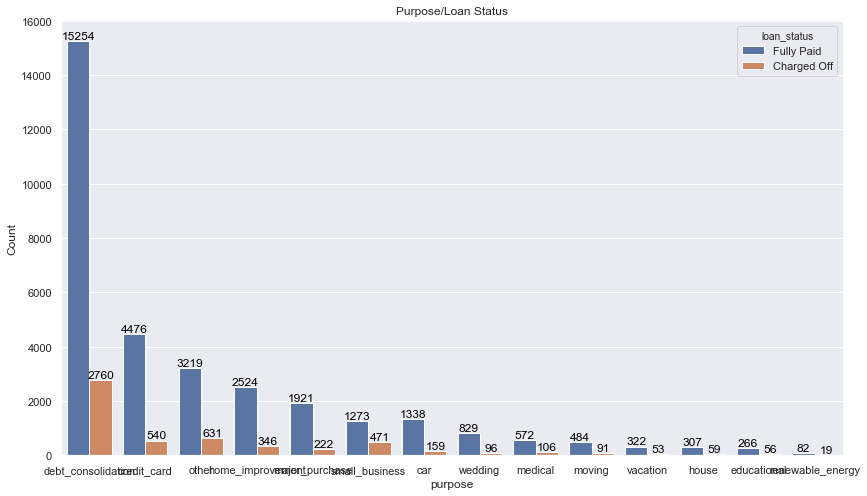

In [386]:
draw_univariate_plot(column_name='purpose',title='Purpose/Loan Status',df=loan_not_current_df,type_of_variable="Categorical",hue="loan_status")

###### 3.2.1.4 Issue Year
Conclusion
- Loan is increasing since 2007 and not decreaseing


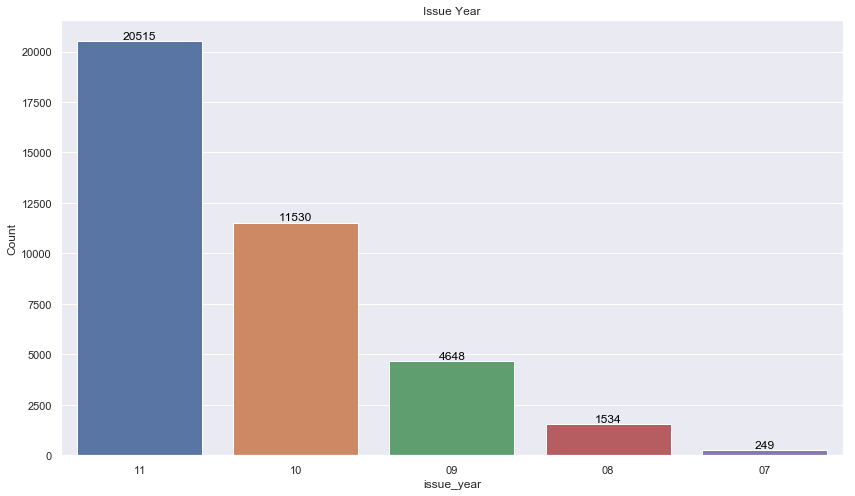

In [387]:
draw_univariate_plot(column_name='issue_year',title='Issue Year',df=loan_not_current_df,type_of_variable="Categorical")

###### 3.2.1.5 Employee Length
Conclusion
- Most loan exists between people with experience 2-9 years

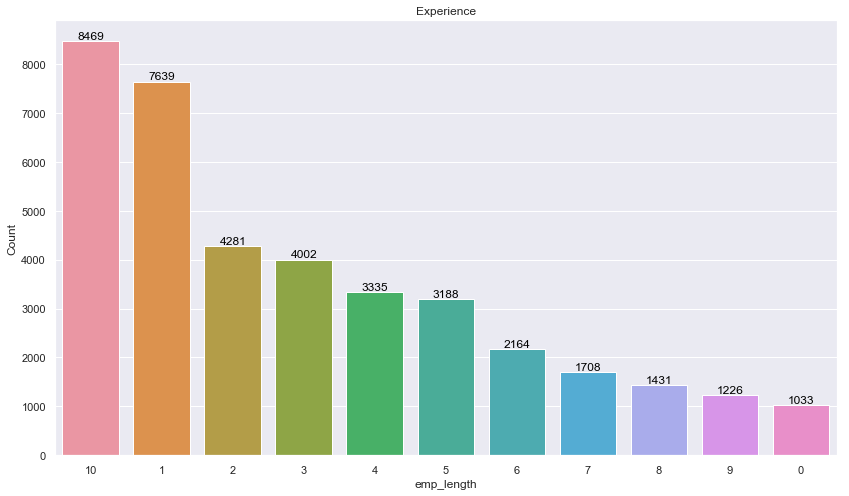

In [388]:
draw_univariate_plot(column_name='emp_length',title='Experience',df=loan_not_current_df,type_of_variable="Categorical")

###### 3.2.1.5 Grade
Conclusion
- 

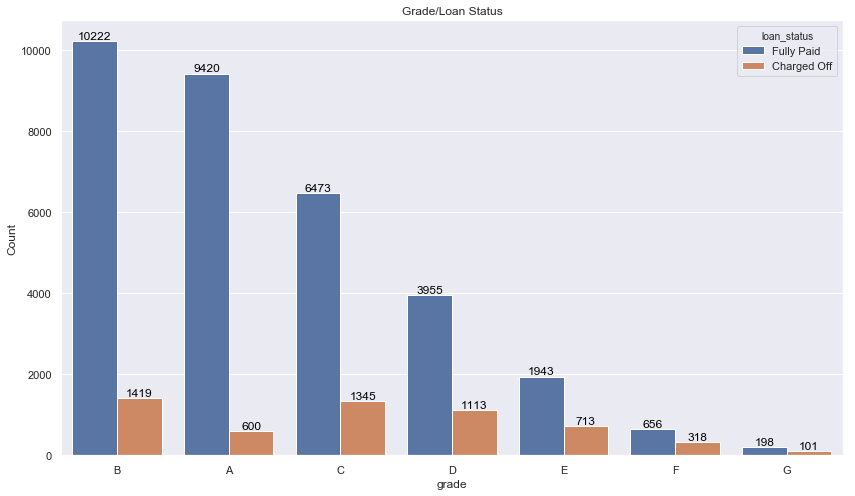

In [389]:
draw_univariate_plot(column_name='grade',title='Grade/Loan Status',df=loan_not_current_df,type_of_variable="Categorical",hue="loan_status")

###### 3.2.1.5 Term
Conclusion
- Majority of the loan applied for 36 months term approx 75%

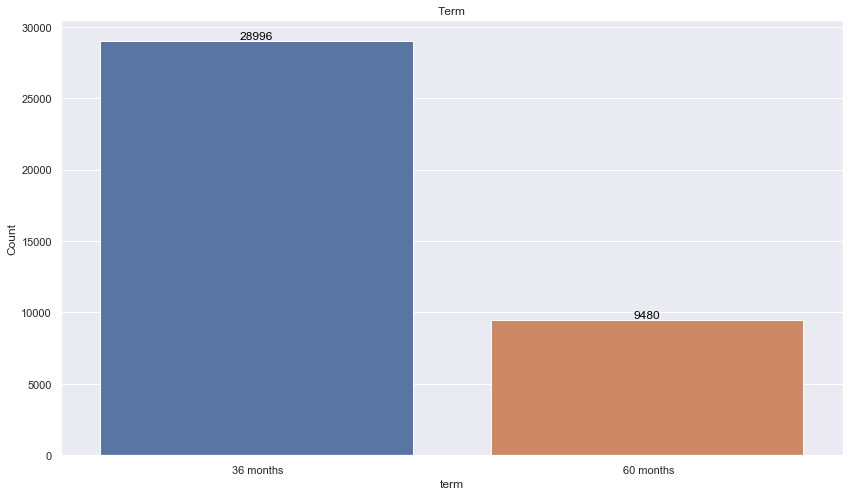

In [390]:
draw_univariate_plot(column_name='term',title='Term',df=loan_not_current_df,type_of_variable="Categorical")

###### 3.2.2 Continous Variables - Univariate Analysis
- Interest Rate
- Annual Income
- Loan Amount
- Funded Amount

###### 3.2.2.1 Interest Rate
Conclusion
- Interest rate is between 9-14%

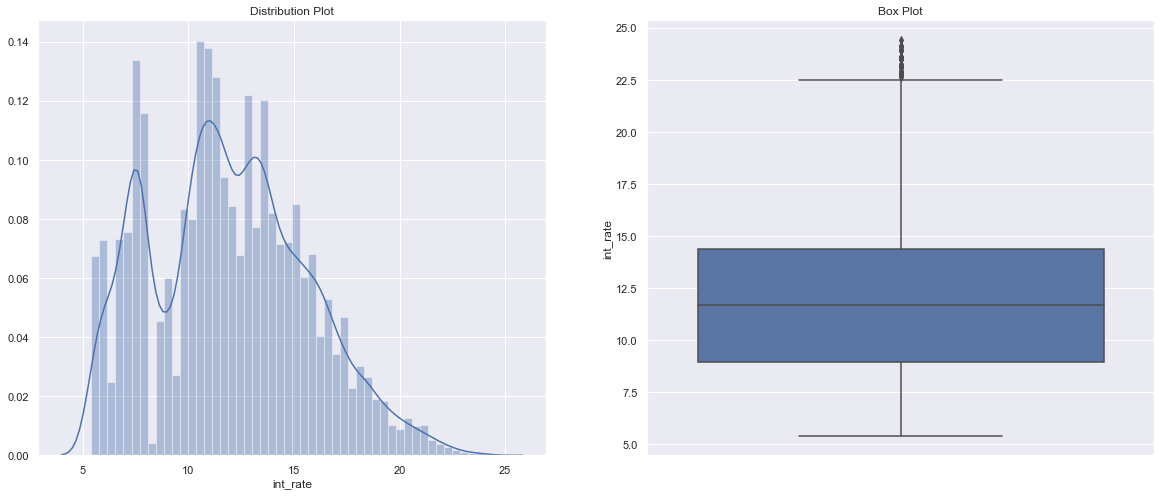

In [391]:
draw_univariate_plot(column_name='int_rate',df=loan_not_current_df,type_of_variable="Continous")

###### 3.2.2.1 Annual Income
Conclusion
- Outlier exists , can we remove them?

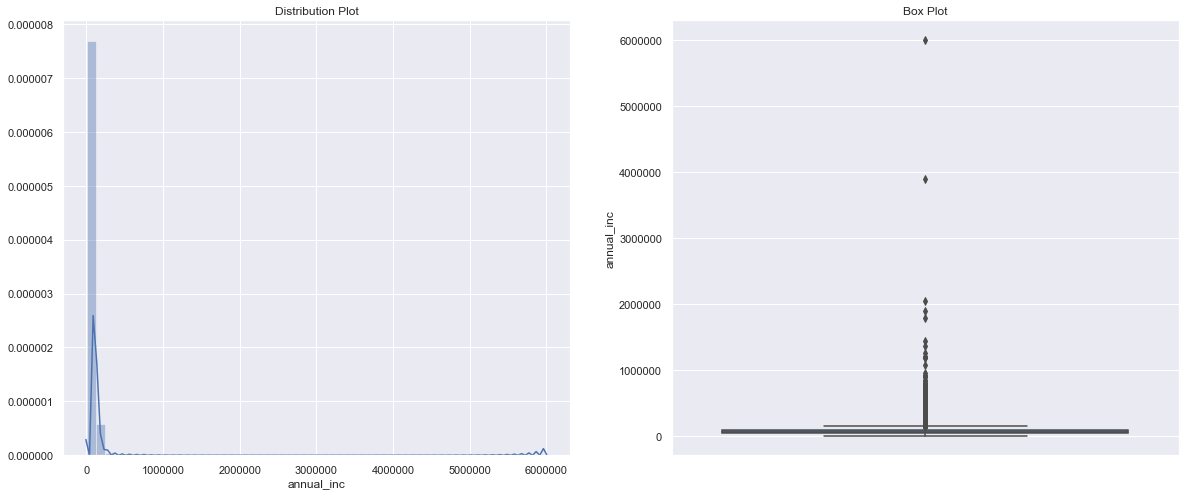

In [392]:
draw_univariate_plot(column_name='annual_inc',df=loan_not_current_df,type_of_variable="Continous")

###### 3.2.2.1 Loan Amount
Conclusion
- Most loan exists between 5000& 15000

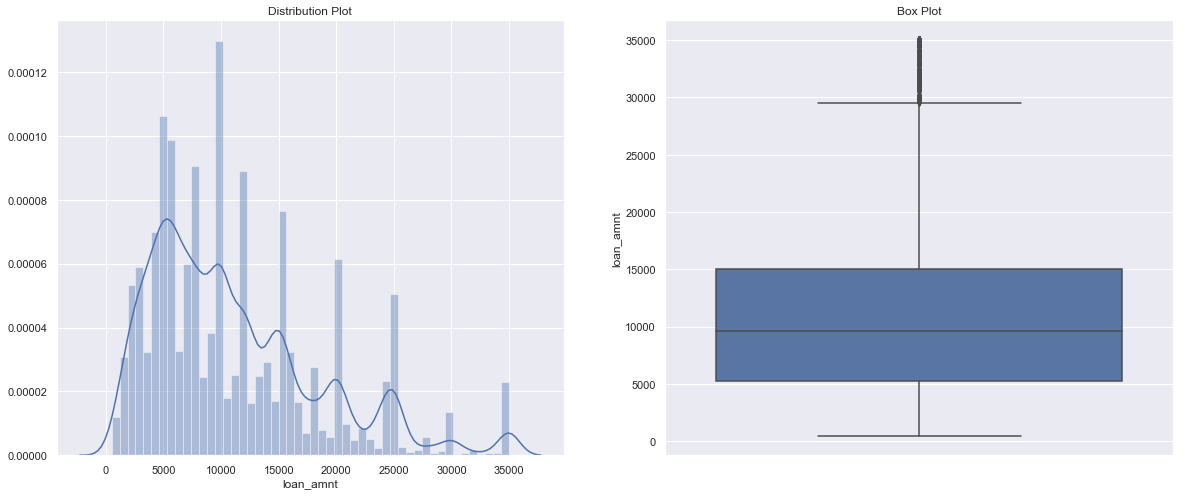

In [393]:
draw_univariate_plot(column_name='loan_amnt',df=loan_not_current_df,type_of_variable="Continous")

###### 3.2.2.1 Funded Amount
Conclusion
- Most loan exists between 5000& 15000
- outlier exists

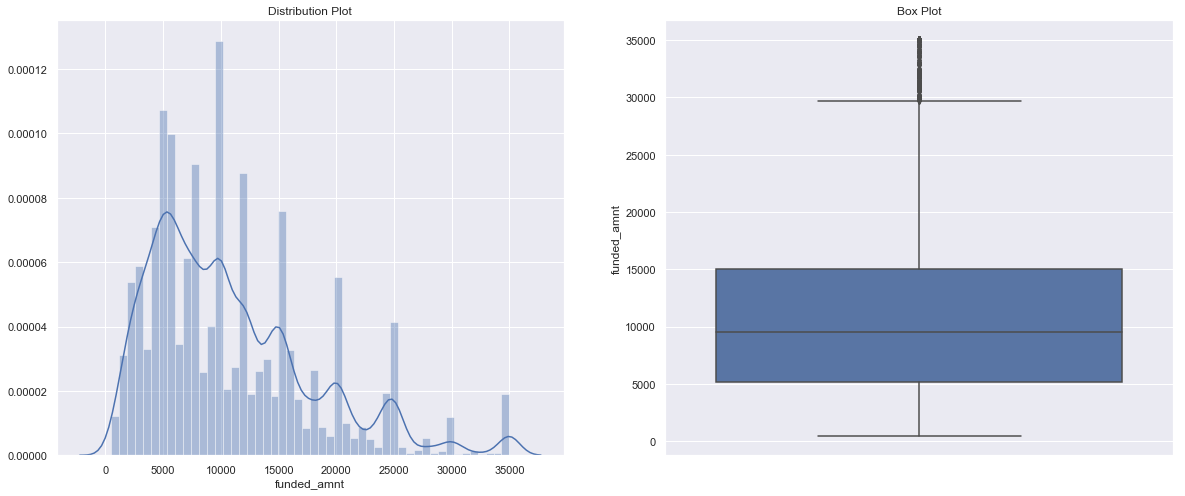

In [394]:
draw_univariate_plot(column_name='funded_amnt',df=loan_not_current_df,type_of_variable="Continous")

###### 3.3.1 BiVariate Analysis

In [395]:
def draw_bivariate_plot(column_name,df,hue=None,title=None):
 sns.set(style="darkgrid")
 plt.figure(figsize=(20,8))
 ax =sns.countplot(x=column_name,hue=hue,data=df)
 ax.set(xlabel=column_name, ylabel='Count')
 plt.title(title)
 plt.tight_layout()


 for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., np.nan_to_num(p.get_height()), '%d' % int(np.nan_to_num(p.get_height())), 
            fontsize=12, color='black', ha='center', va='bottom')
 plt.show()  

###### 3.2.2.1 Heat Map 
Conclusion
- Obviously the correlation exists in the funded_amnt,funded_amnt_inv ,loan_amnt,installement

In [396]:
#create a correlation 
corr_loan=loan_not_current_df[['loan_amnt','funded_amnt','funded_amnt_inv','annual_inc','int_rate','emp_length','dti','installment']].corr() 
corr_loan

,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,int_rate,emp_length,dti,installment
loan_amnt,1.000000,0.981877,0.938448,0.268944,0.301100,0.156456,0.062389,0.932318
funded_amnt,0.981877,1.000000,0.956592,0.264716,0.304841,0.156128,0.062170,0.958014
funded_amnt_inv,0.938448,0.956592,1.000000,0.252288,0.297555,0.164252,0.070330,0.906081
annual_inc,0.268944,0.264716,0.252288,1.000000,0.048880,0.121523,-0.121358,0.267691
int_rate,0.301100,0.304841,0.297555,0.048880,1.000000,0.011634,0.110876,0.276984
emp_length,0.156456,0.156128,0.164252,0.121523,0.011634,1.000000,0.048975,0.131485
dti,0.062389,0.062170,0.070330,-0.121358,0.110876,0.048975,1.000000,0.052135
installment,0.932318,0.958014,0.906081,0.267691,0.276984,0.131485,0.052135,1.000000


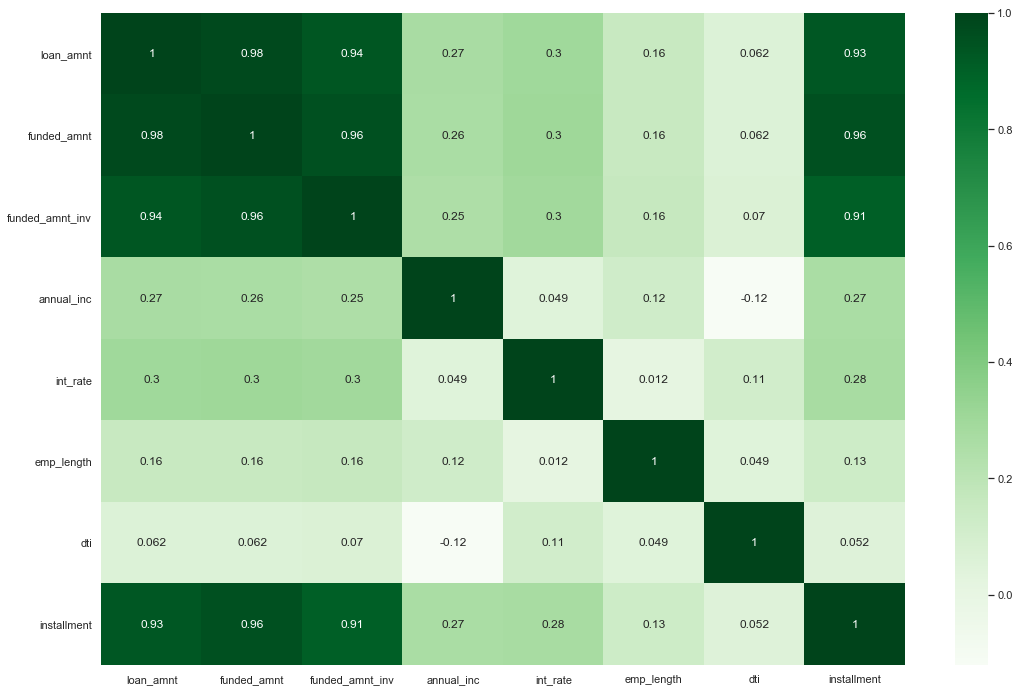

In [397]:
#Heat map to show the correlation 
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_loan, 
            xticklabels=corr_loan.columns.values,
            yticklabels=corr_loan.columns.values,annot= True,cmap="Greens")
plt.show()

In [398]:
#clearly the NE state has more number of the defaulters,but the total loans is also less
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_status'], loan_not_current_df['addr_state'], margins=True).style.background_gradient(cmap = cm)


addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,All
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,15,54,26,121,1121,96,94,15,12,503,214,28,0,1,197,0,31,45,53,158,162,0,103,81,113,2,11,114,3,25,277,30,108,494,155,40,71,179,25,66,12,2,315,40,176,6,127,63,21,4,5609
Fully Paid,63,381,208,723,5806,665,631,192,101,2274,1139,138,5,5,1278,9,222,266,373,1134,859,3,599,523,556,16,71,635,2,141,1510,153,370,3197,1021,247,363,1288,168,392,50,15,2338,212,1186,45,691,376,151,76,32867
All,78,435,234,844,6927,761,725,207,113,2777,1353,166,5,6,1475,9,253,311,426,1292,1021,3,702,604,669,18,82,749,5,166,1787,183,478,3691,1176,287,434,1467,193,458,62,17,2653,252,1362,51,818,439,172,80,38476


######  Loan Amount vs Term

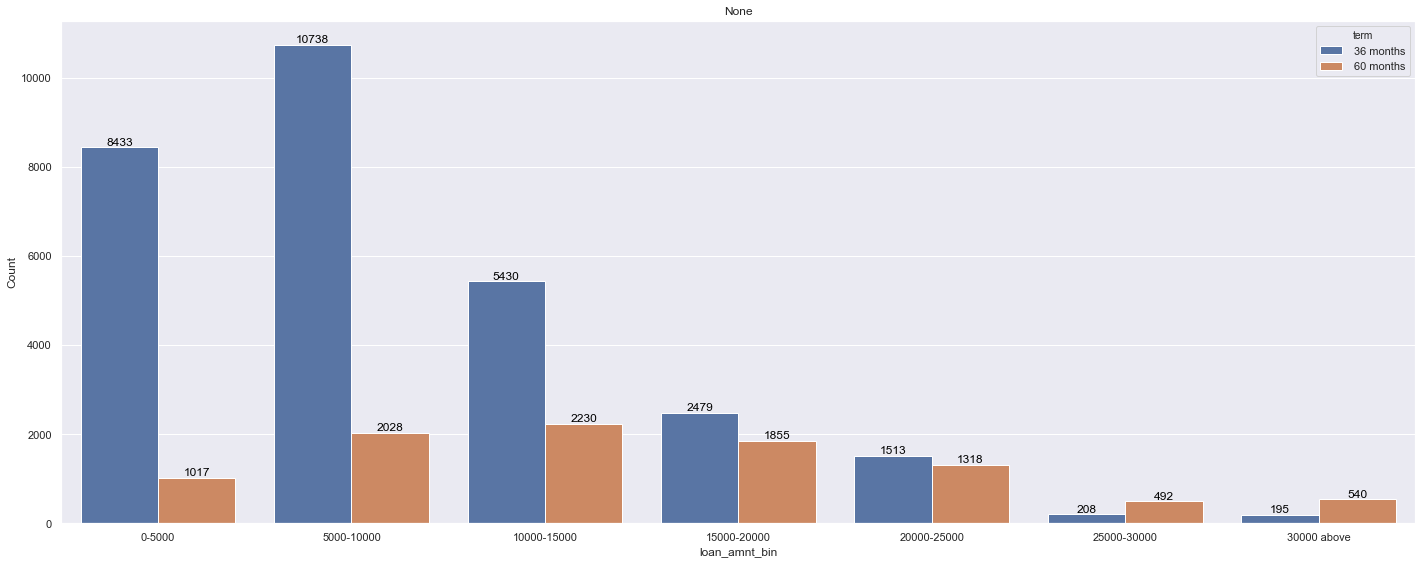

In [399]:
draw_bivariate_plot(column_name="loan_amnt_bin",hue="term",df=loan_not_current_df)

In [400]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['loan_amnt_bin'], loan_not_current_df['term'], margins=True).style.background_gradient(cmap = cm)

term,36 months,60 months,All
loan_amnt_bin,,,
0-5000,8433,1017,9450
5000-10000,10738,2028,12766
10000-15000,5430,2230,7660
15000-20000,2479,1855,4334
20000-25000,1513,1318,2831
25000-30000,208,492,700
30000 above,195,540,735
All,28996,9480,38476


######  Interest Rate by Grade
Conclusion 
- Grade A - 5.5-9.0 
- Grade B - 9.0 - 12.0
- Grade C - 12.0 - 15
- Grade D/E/F - 15 and above

Interest Rate increases with the Grade A-G 

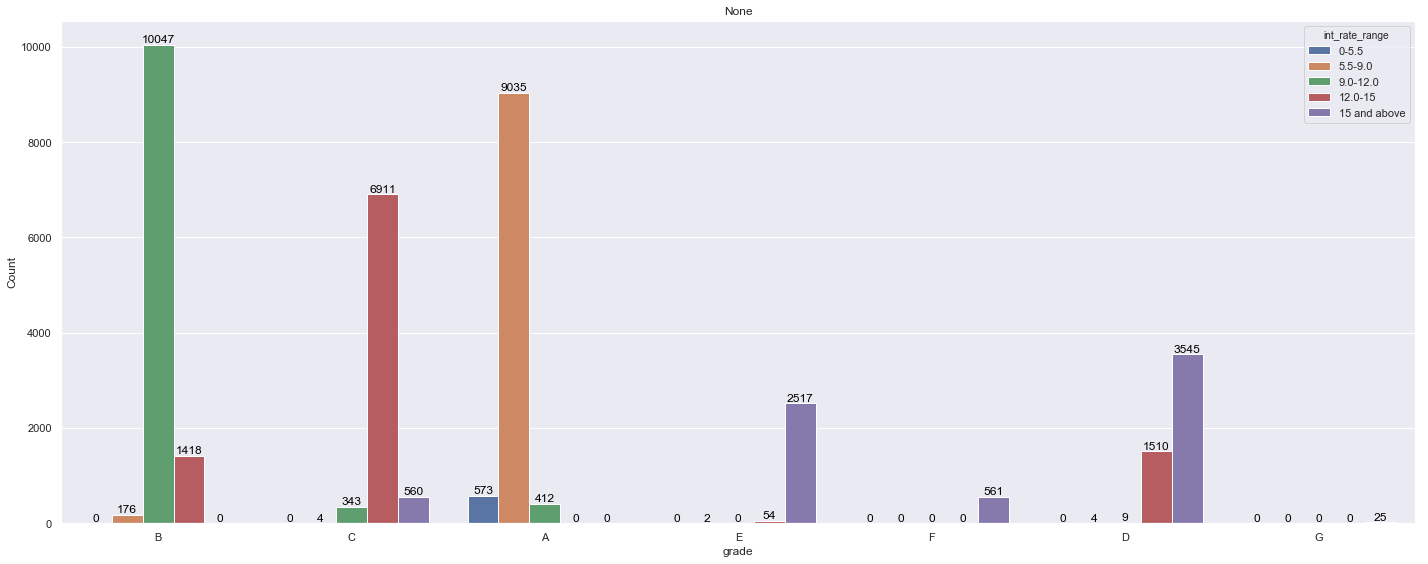

In [401]:
draw_bivariate_plot(column_name="grade",hue="int_rate_range",df=loan_not_current_df)

In [402]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['int_rate_range'], loan_not_current_df['grade'], margins=True).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G,All
int_rate_range,,,,,,,,
0-5.5,573,0,0,0,0,0,0,573
5.5-9.0,9035,176,4,4,2,0,0,9221
9.0-12.0,412,10047,343,9,0,0,0,10811
12.0-15,0,1418,6911,1510,54,0,0,9893
15 and above,0,0,560,3545,2517,561,25,7208
All,10020,11641,7818,5068,2573,561,25,37706


######  Loan Amount vs Anual Income
- Total number of loan increases with the income rise
- Most of the loans are taken by people whose income is above 30000 and Loan amount in range 5000-10000

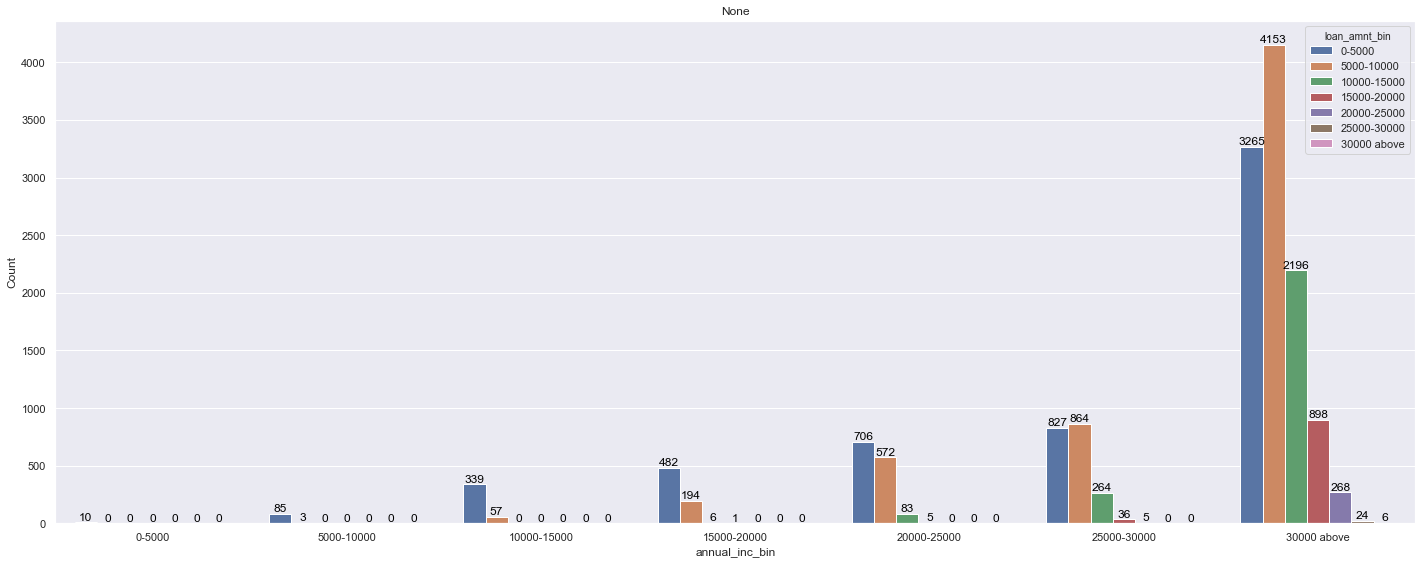

In [403]:
draw_bivariate_plot(column_name="annual_inc_bin",hue="loan_amnt_bin",df=loan_not_current_df)

In [404]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['annual_inc_bin'], loan_not_current_df['loan_amnt_bin'], margins=True).style.background_gradient(cmap = cm)

loan_amnt_bin,0-5000,5000-10000,10000-15000,15000-20000,20000-25000,25000-30000,30000 above,All
annual_inc_bin,,,,,,,,
0-5000,10,0,0,0,0,0,0,10
5000-10000,85,3,0,0,0,0,0,88
10000-15000,339,57,0,0,0,0,0,396
15000-20000,482,194,6,1,0,0,0,683
20000-25000,706,572,83,5,0,0,0,1366
25000-30000,827,864,264,36,5,0,0,1996
30000 above,3265,4153,2196,898,268,24,6,10810
All,5714,5843,2549,940,273,24,6,15349


######  Loan Amount vs Annual Income(Defaulters)
- Total number of loan increases with the income rise
- Most of the loans are taken by people whose income is above 30000 and Loan amount in range 5000-10000

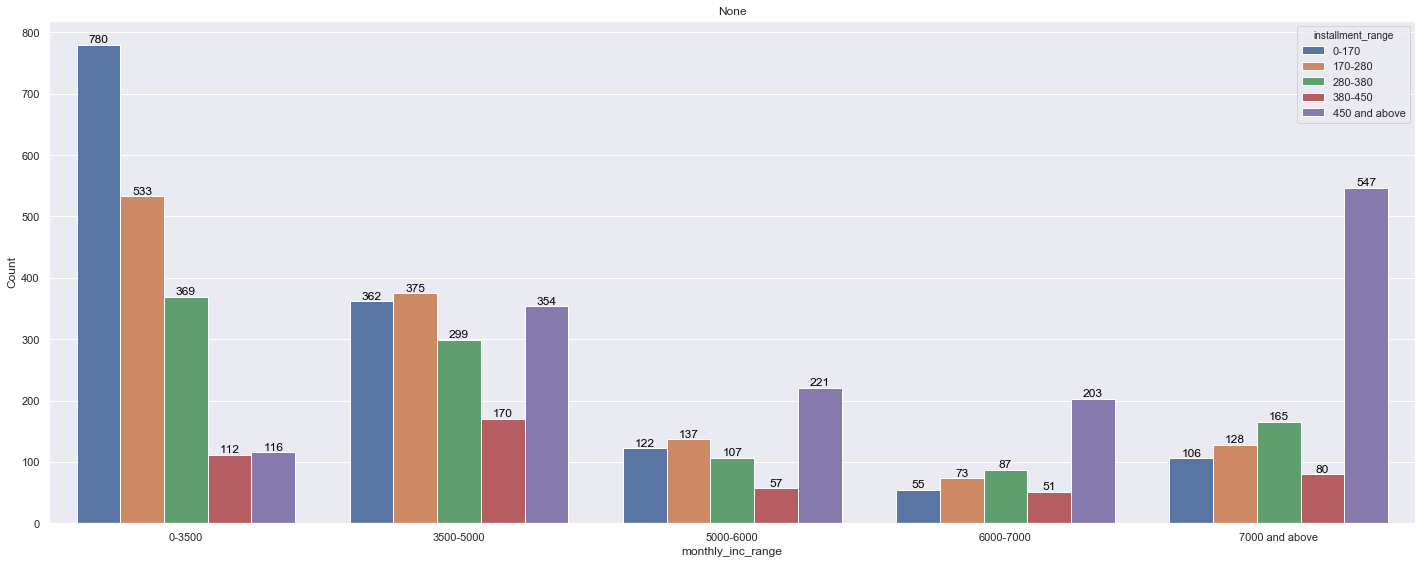

In [405]:
draw_bivariate_plot(column_name="monthly_inc_range",hue="installment_range",df=loan_defaulters)

In [406]:
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(loan_not_current_df['monthly_inc_range'], loan_not_current_df['installment_range'], margins=True).style.background_gradient(cmap = cm)

installment_range,0-170,170-280,280-380,380-450,450 and above,All
monthly_inc_range,,,,,,
0-3500,4712,3151,1686,598,572,10719
3500-5000,2664,2703,2077,908,1836,10188
5000-6000,1023,1106,971,450,1242,4792
6000-7000,572,775,731,335,1211,3624
7000 and above,1160,1571,1647,798,3977,9153
All,10131,9306,7112,3089,8838,38476
